In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link='https://drive.google.com/open?id=1UIYlJKU3OLz2fpsQGfQWdUSnXydJKk5U'

In [3]:
fluff, id = link.split('=')
print(id) # Verify that you have everything after '='

1UIYlJKU3OLz2fpsQGfQWdUSnXydJKk5U


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('NYW.csv')  

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
df = pd.read_csv('NYW.csv')

In [7]:
df.head()

,USW00014732,"LA GUARDIA AIRPORT, NY US",7/1/2017,9.84
0,USW00014732,"LA GUARDIA AIRPORT, NY US",7/2/2017,8.72
1,USW00014732,"LA GUARDIA AIRPORT, NY US",7/3/2017,7.83
2,USW00014732,"LA GUARDIA AIRPORT, NY US",7/4/2017,4.92
3,USW00014732,"LA GUARDIA AIRPORT, NY US",7/5/2017,9.62
4,USW00014732,"LA GUARDIA AIRPORT, NY US",7/6/2017,8.05


In [8]:
L=len(df)
print("Length of Dataframe:",L)

Length of Dataframe: 731


In [0]:
y = np.array([df.iloc[:,3]])

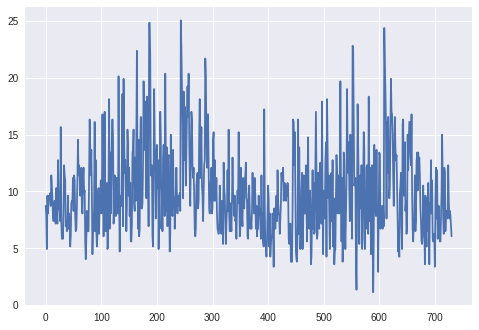

In [10]:
plt.plot(y[0,:])
plt.show(block=False)

In [0]:
X1 = y[:,0:L-5]
X2 = y[:,1:L-4]
X3 = y[:,2:L-3]


In [0]:
X = np.concatenate([X1,X2,X3],axis=0)
X = np.transpose(X)

In [0]:
y = np.transpose(y[:,3:L-2])

In [0]:
sc= MinMaxScaler()
sc.fit(X)
X= sc.transform(X)

In [0]:
sc1 = MinMaxScaler()
sc1.fit(y)
y= sc1.transform(y)

In [0]:
X = np.reshape(X,(X.shape[0],1,X.shape[1]))


In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [18]:
model = Sequential([
LSTM(10,activation='tanh',input_shape=(1,3),recurrent_activation='hard_sigmoid'),
Dense(1),
])
# Model Summary
model.summary()
# Compiling the Model
model.compile(loss="mean_squared_error",optimizer='adam',metrics=["mean_absolute_error"])
# Fitting the Model
model.fit(X_train,y_train,epochs=25,batch_size=1,verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
508/508 [==============================] - 1s 3ms/step - loss: 0.0680 - mean_absolute_error: 0.1949
Epoch 2/25
508/508 [==============================] - 1s 2ms/step - loss: 0.0271 - mean_absolute_error: 0.1284
Epoch 3/25
508/508 [==============================] - 1s 2ms/step - loss: 0.0262 - mean_absolute_error: 0.1259
Epoch 4/25
508/508 [==============================] - 1s 2ms/step - loss: 0.0255 - mean_absolute_error: 0.1244
Epoch 5/25
508/508 [==============================] - 1s 2ms/step - loss: 0.0248 - mean_absolute

In [19]:
predictions=model.predict(X_test,verbose=1)
print(predictions[:5])

218/218 [==============================] - 0s 404us/step
[[0.31874883]
 [0.39704728]
 [0.28619474]
 [0.3207031 ]
 [0.37252852]]


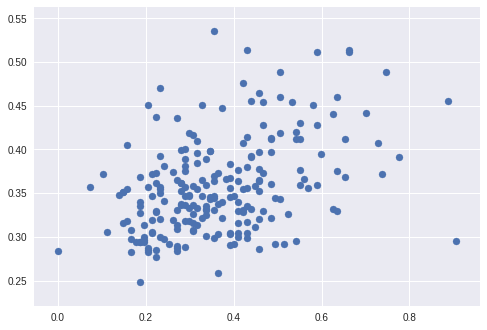

In [20]:
plt.figure(2)
plt.scatter(y_test,predictions)
plt.show(block=False)

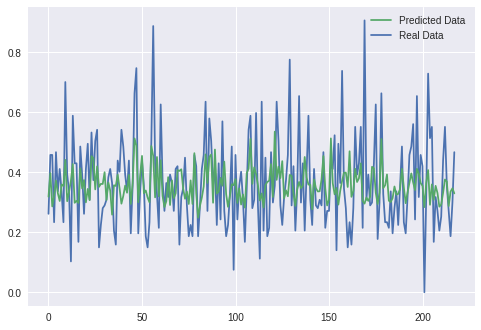

In [21]:
plt.figure(3)
Real,=plt.plot(y_test)
Predict, = plt.plot(predictions)
plt.legend([Predict,Real],["Predicted Data","Real Data"])
plt.show()